Using the dataset attached, attempt the following questions;

1. Compute the mean, median, and standard deviation for BMI, PhysicalHealth, MentalHealth, and SleepTime.
2. Determine the proportion of individuals with heart disease in the dataset.
3. Analyze the distribution of age categories in the dataset using appropriate visualization.
4. Compare the average BMI between individuals with and without heart disease. Use visualization to support your findings.
5. Investigate the relationship between physical activity and general health. Present your analysis using an appropriate visualization.
6. Does smoking have a significant association with heart disease? Use a statistical test to validate your claim.
7. Explore the correlation between sleep time and mental health. What insights can you draw?
8. Build a logistic regression model to predict heart disease based on BMI, physical activity, smoking, and diabetes status.
9. If you were to predict heart disease based on this dataset, which features would you include in your model, and why?
10. Based on the findings from the dataset, what recommendations can you give to reduce the risk of heart disease?

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# loading the dataset
df=pd.read_csv("C:\\Users\\ADMIN\\Downloads\\heart_2020_cleaned.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
#checking for missing values
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

1. Compute the mean, median, and standard deviation for BMI, PhysicalHealth, MentalHealth, and SleepTime.

In [7]:
def summary(df, col):
    print(f"{col} mean: {df[col].mean()}")
    print(f"{col} median: {df[col].median()}")
    print(f"{col} standard deviation: {df[col].std()}")

# Calculating mean, median and std for bmi column
summary(df,"BMI")

BMI mean: 28.325398520927465
BMI median: 27.34
BMI standard deviation: 6.356100200471519


In [8]:
# Calculating mean, median and std for PhysicalHealth  column
summary(df,"PhysicalHealth")

PhysicalHealth mean: 3.3717100017198516
PhysicalHealth median: 0.0
PhysicalHealth standard deviation: 7.95085018257456


In [9]:
# Calculating mean, median and std for MentalHealth  column
summary(df,"MentalHealth")

MentalHealth mean: 3.898366140808956
MentalHealth median: 0.0
MentalHealth standard deviation: 7.955235218946832


2. Determine the proportion of individuals with heart disease in the dataset.

In [12]:
# Checking the distribution of heart disease 
df['HeartDisease'].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

3. Analyze the distribution of age categories in the dataset using appropriate visualization.

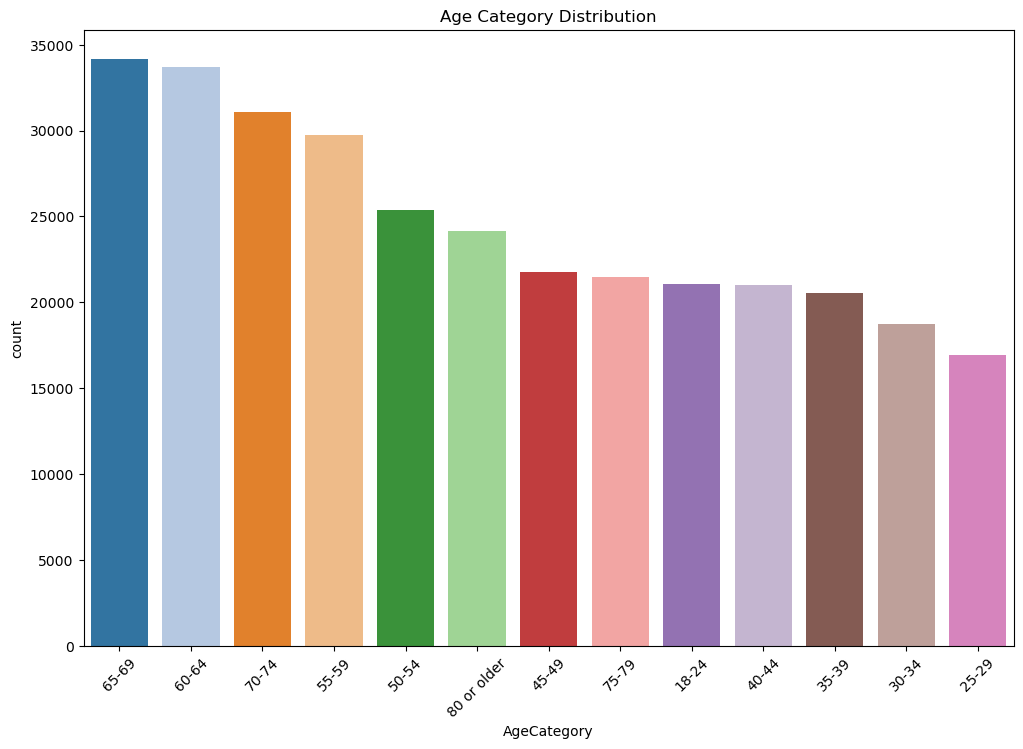

In [14]:
# Setting the size of the plot
plt.figure(figsize=(12,8))

# Plotting a count plot
sns.countplot(data=df, x="AgeCategory", palette="tab20", order=df["AgeCategory"].value_counts().index)

# Adding title
plt.title("Age Category Distribution")
plt.xticks(rotation=45)
plt.show()

4. Compare the average BMI between individuals with and without heart disease. Use visualization to support your findings.

HeartDisease
No     28.224658
Yes    29.401592
Name: BMI, dtype: float64


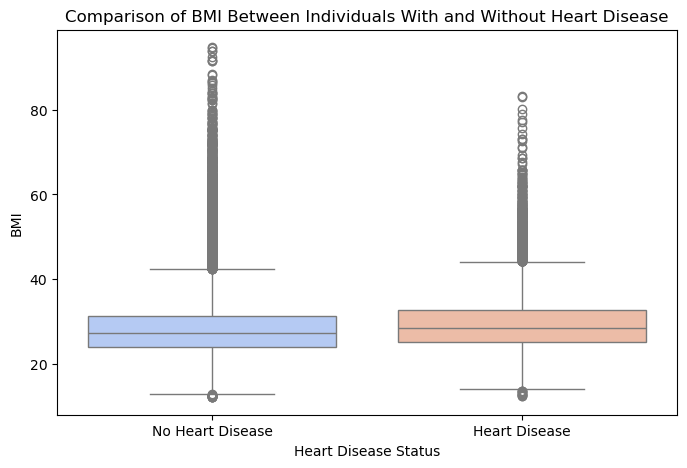

In [16]:
# Grouping by heart disease status and compute the mean BMI
bmi_comparison = df.groupby("HeartDisease")["BMI"].mean()
print(bmi_comparison)
# boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x="HeartDisease", y="BMI", data=df, palette="coolwarm")
plt.xticks([0, 1], ["No Heart Disease", "Heart Disease"])
plt.title("Comparison of BMI Between Individuals With and Without Heart Disease")
plt.xlabel("Heart Disease Status")
plt.ylabel("BMI")
plt.show()


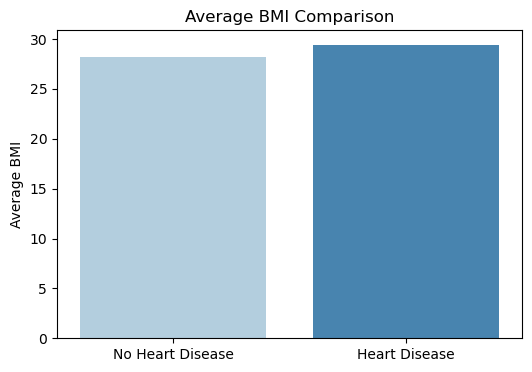

In [17]:
# barplot
plt.figure(figsize=(6, 4))
sns.barplot(x=["No Heart Disease", "Heart Disease"], y=bmi_comparison.values, palette="Blues")
plt.title("Average BMI Comparison")
plt.ylabel("Average BMI")
plt.show()


5. Investigate the relationship between physical activity and general health. Present your analysis using an appropriate visualization.

In [19]:
#ho= Theres is no relationship btwn physical activity and general health.
#h1= Theres is relationship btwn physical activity and general health.
import scipy as scipy
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(df['PhysicalActivity'],df['GenHealth'])

In [21]:
chi2,p,dof,expected=chi2_contingency(contingency_table)
chi2

27560.754901589826

In [22]:
p

0.0

In [23]:
dof

4

In [24]:
expected

array([[15015.23036946,  7789.7600838 , 20920.28049844,  2535.93452681,
        25576.79452149],
       [51826.76963054, 26887.2399162 , 72208.71950156,  8753.06547319,
        88281.20547851]])

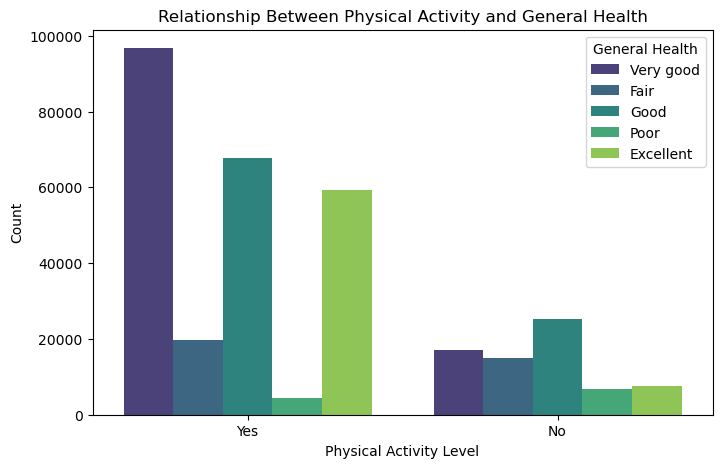

In [29]:
# Group by Physical Activity levels and get the mean General Health score
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="PhysicalActivity", hue="GenHealth", palette="viridis")
plt.title("Relationship Between Physical Activity and General Health")
plt.xlabel("Physical Activity Level")
plt.ylabel("Count")
plt.legend(title="General Health")
plt.show()


# observations
* p value is 0.0 hence we reject the null hypothesis
## Higher Physical Activity Correlates with Better General Health

* Individuals with moderate to high physical activity levels tend to report better health .
* Those with low physical activity are more likely to report "Poor" or "Fair" health.

6. Does smoking have a significant association with heart disease? Use a statistical test to validate your claim.


In [31]:
#ho= smokers have no significant association with heart disease
#h1= smokers have a  significant association with heart disease.
import scipy as scipy
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(df['Smoking'],df['HeartDisease'])

In [32]:
chi2,p,dof,expected = chi2_contingency(contingency_table)
chi2

3713.0331469808216

In [33]:
p

0.0

In [34]:
dof

1

# observation
* P value being 0.0 hence we reject the null hypothesis thus smokers have a significant association with herat disease

7. Explore the correlation between sleep time and mental health. What insights can you draw?

In [35]:
# Correlation between sleep time and mental health
df["SleepTime"].corr(df["MentalHealth"])

-0.11971678803142115

# observations
## Slight Inverse Relationship
* As sleep time increases, mental health scores tend to slightly improve (lower distress).

8. Build a logistic regression model to predict heart disease based on BMI, physical activity, smoking, and diabetes status.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Label Encoding for Binary Variables
label_encoder = LabelEncoder()
df["Smoking"] = label_encoder.fit_transform(df["Smoking"])  # Yes = 1, No = 0
df["Diabetic"] = label_encoder.fit_transform(df["Diabetic"])  # Yes = 1, No = 0
df["PhysicalActivity"] = label_encoder.fit_transform(df["PhysicalActivity"])  # Yes = 1, No = 0

# Define X (independent variables) and y (dependent variable)
X = df[["BMI", "PhysicalActivity", "Smoking", "Diabetic"]]
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train["BMI"] = scaler.fit_transform(X_train[["BMI"]])
X_test["BMI"] = scaler.transform(X_test[["BMI"]])
# Initialize model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

In [42]:
y_pred = model.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9144


9. If you were to predict heart disease based on this dataset, which features would you include in your model, and why?

In [47]:
from sklearn.feature_selection import mutual_info_classif
# Computing Mutual Information scores
mi_scores = mutual_info_classif(X, y, discrete_features=[1, 2, 3])  # Discrete features: Physical Activity, Smoking, Diabetic

# Convert to DataFrame
mi_scores_df = pd.DataFrame({"Feature": X.columns, "MI Score": mi_scores})
mi_scores_df = mi_scores_df.sort_values(by="MI Score", ascending=False)

# Display MI scores
print(mi_scores_df)

            Feature  MI Score
3          Diabetic  0.013324
2           Smoking  0.005699
1  PhysicalActivity  0.004518
0               BMI  0.002402


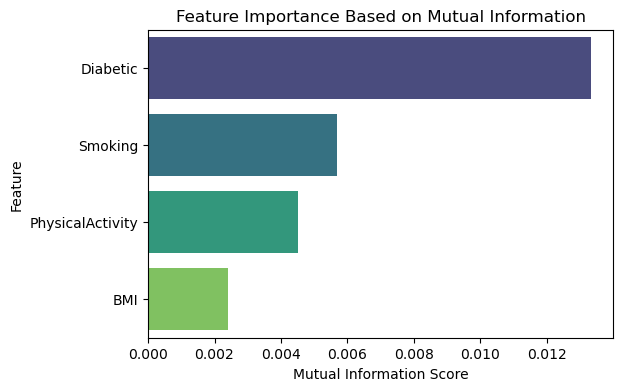

In [48]:
plt.figure(figsize=(6, 4))
sns.barplot(x="MI Score", y="Feature", data=mi_scores_df, palette="viridis")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.title("Feature Importance Based on Mutual Information")
plt.show()



10. Based on the findings from the dataset, what recommendations can you give to reduce the risk of heart disease?

 ## Quit Smoking
* Smoking damages blood vessels, increases blood pressure, and lowers oxygen levels in the blood.
 ## Increase Physical Activity
* Physical activity improves heart function, lowers blood pressure, and reduces obesity.
## Maintain a Healthy Weight (Manage BMI)
* High BMI (overweight/obesity) increases blood pressure, cholesterol levels, and diabetes risk, which all contribute to heart disease.